# Preliminaries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import sys
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

sys.path.append("/Users/paolo/Documents/methods/CMI_FS")
from feature_selection import forwardFeatureSelection

sys.path.append("/Users/paolo/Documents/methods/LinCFA")
from LinCFA import LinCFA

sys.path.append("/Users/paolo/Documents/Droughts/Paolo/regression_LinCFA")
from aux import standardize,unfold_dataset,compute_r2,prepare_target,prepare_features,aggregate_unfolded_data,FS_with_linearWrapper,compare_methods


In [2]:
def plot_cells(output,selected_colnames, xmin=9, xmax=11, ymin=44, ymax=45.5):
    x = []
    y = []
    colors = cm.rainbow(np.linspace(0,1,len(output)))
    fig, ax = plt.subplots(2)
    ax[0].set_xlim(xmin,xmax)
    ax[1].set_xlim(xmin,xmax)
    ax[0].set_ylim(ymin,ymax)
    ax[1].set_ylim(ymin,ymax)
    for i in range(len(output)): 
        #print(len(output[i]))
        x = []
        y = []
        
        for datum in output[i]:
            x.append(float(datum.split('_')[1]))
            y.append(float(datum.split('_')[2]))
        ax[0].scatter(x,y,color=colors[i])
    
    x = []
    y = []
    col = cm.rainbow(np.linspace(0,1,len(selected_colnames)))
    for i in range(len(selected_colnames)): 
        idx = int(selected_colnames[i].split('_')[-1])
        for datum in output[idx]:
            x.append(float(datum.split('_')[1]))
            y.append(float(datum.split('_')[2]))
        ax[1].scatter(x,y,color=col[i])
    

# Target 

target samples:            date      mean  median  year  week  mean_std
0    2001-01-05  0.214281    0.00  2001     1 -1.402730
1    2001-01-13  0.484737    0.52  2001     2  0.347916
2    2001-01-21  0.466071    0.47  2001     3  0.227090
3    2001-01-29  0.417470    0.44  2001     5 -0.087501
4    2001-02-06  0.492202    0.53  2001     6  0.396235
..          ...       ...     ...   ...   ...       ...
584  2013-10-21  0.739946    0.79  2013    43  1.999865
585  2013-10-29  0.447691    0.46  2013    44  0.108118
586  2013-11-06  0.541628    0.56  2013    45  0.716163
587  2013-11-14  0.493719    0.53  2013    46  0.406051
588  2013-11-22  0.527436    0.57  2013    47  0.624301

[589 rows x 6 columns]
 target shapes: ((589, 6), (200, 6), (789, 6), (192, 6))


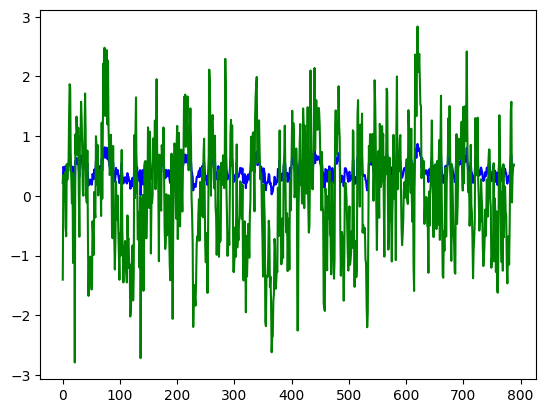

In [3]:
target_df_train,target_df_val,target_df_test,target_df_trainVal = prepare_target('')
plt.plot(target_df_trainVal.loc[:,'mean'], color='blue')
plt.plot(target_df_trainVal.loc[:,'mean_std'], color='green')

# 1) Aggregations: temperature, precipitation, both 

## temperature

### full data

In [4]:
path='/Users/paolo/Documents/OneDrive - Politecnico di Milano/droughts/features/csv_allvalues/temporal_aggreg/Emiliani2_aggreg.csv'
pd.read_csv(path).columns

Index(['date', 'y', 'x', 'year', 'week', 'cyclostationary_mean_tg',
       'cyclostationary_mean_rr', 'cyclostationary_mean_tg_1w',
       'cyclostationary_mean_tg_4w', 'cyclostationary_mean_tg_8w',
       'cyclostationary_mean_tg_12w', 'cyclostationary_mean_tg_16w',
       'cyclostationary_mean_tg_24w', 'cyclostationary_mean_rr_1w',
       'cyclostationary_mean_rr_4w', 'cyclostationary_mean_rr_8w',
       'cyclostationary_mean_rr_12w', 'cyclostationary_mean_rr_16w',
       'cyclostationary_mean_rr_24w'],
      dtype='object')

In [5]:
target_df_train,target_df_val,target_df_test,target_df_trainVal = prepare_target('')

path='/Users/paolo/Documents/OneDrive - Politecnico di Milano/droughts/features/csv_allvalues/temporal_aggreg/Emiliani2_aggreg.csv'

output,aggregate_trainVal,aggregate_test = aggregate_unfolded_data(path,['cyclostationary_mean_tg', 
                                                                         'cyclostationary_mean_tg_1w',
                                                                         'cyclostationary_mean_tg_4w', 
                                                                         'cyclostationary_mean_tg_8w',
                                                                         'cyclostationary_mean_tg_12w', 
                                                                         'cyclostationary_mean_tg_16w',
                                                                         'cyclostationary_mean_tg_24w'
                                                                        ],
                                                                   target_df_trainVal)

selected_colnames = FS_with_linearWrapper(aggregate_trainVal, target_df_train, target_df_val, 100)

compare_methods(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames)


target samples:            date      mean  median  year  week  mean_std
0    2001-01-05  0.214281    0.00  2001     1 -1.402730
1    2001-01-13  0.484737    0.52  2001     2  0.347916
2    2001-01-21  0.466071    0.47  2001     3  0.227090
3    2001-01-29  0.417470    0.44  2001     5 -0.087501
4    2001-02-06  0.492202    0.53  2001     6  0.396235
..          ...       ...     ...   ...   ...       ...
584  2013-10-21  0.739946    0.79  2013    43  1.999865
585  2013-10-29  0.447691    0.46  2013    44  0.108118
586  2013-11-06  0.541628    0.56  2013    45  0.716163
587  2013-11-14  0.493719    0.53  2013    46  0.406051
588  2013-11-22  0.527436    0.57  2013    47  0.624301

[589 rows x 6 columns]
 target shapes: ((589, 6), (200, 6), (789, 6), (192, 6))
Number of features: 130

Number of aggregated features: 42

Number of features: 130

Number of aggregated features: 49

Number of features: 130

Number of aggregated features: 36

Number of features: 130

Number of aggregated featu

actual training score: 0.3036338227567562
actual validation score: 0.6111138991214513, number of remaining columns: 209

actual training score: 0.314397476579345
actual validation score: 0.6083662191163877, number of remaining columns: 208

actual training score: 0.31511880469656894
actual validation score: 0.6162527761309031, number of remaining columns: 207

actual training score: 0.31519760013363163
actual validation score: 0.6198057192392796, number of remaining columns: 206

actual training score: 0.3152005544342489
actual validation score: 0.6201898372429093, number of remaining columns: 205

actual training score: 0.31710363464355207
actual validation score: 0.6195175545249989, number of remaining columns: 204

actual training score: 0.3179017855567724
actual validation score: 0.6218746955095565, number of remaining columns: 203

actual training score: 0.31793310191550084
actual validation score: 0.6204044729825773, number of remaining columns: 202

actual training score: 0.3184

In [6]:
### repeat keeping features with at least three cells
ii = []
for i in range(len(output)):
    if (len(output[i]))>=3: 
        print(i)
        ii.append(i)

selected_colnames = FS_with_linearWrapper(aggregate_trainVal.iloc[:,ii], target_df_train, target_df_val, 10)

compare_methods(aggregate_trainVal.iloc[:,ii], aggregate_test.iloc[:,ii], target_df_trainVal, target_df_test, selected_colnames)


0
1
2
6
9
10
13
14
19
actual training score: 0.13542406146801456
actual validation score: 0.22395861847823129, number of remaining columns: 7

actual training score: 0.14025048804168394
actual validation score: 0.23556054981546648, number of remaining columns: 6

actual training score: 0.15550653016752947
actual validation score: 0.24926128026595873, number of remaining columns: 5

actual training score: 0.1558701632300581
actual validation score: 0.24970647684736436, number of remaining columns: 4

actual training score: 0.1559350020067305
actual validation score: 0.25029283299054106, number of remaining columns: 3

actual training score: 0.1559417385217038
actual validation score: 0.24979899742830747, number of remaining columns: 2

actual training score: 0.15712979159309548
actual validation score: 0.24679153212418126, number of remaining columns: 1

actual training score: 0.16352081049049938
actual validation score: 0.21522313536192583, number of remaining columns: 0

actual traini

In [7]:
### full, forcing a low number of features
target_df_train,target_df_val,target_df_test,target_df_trainVal = prepare_target('')

path='/Users/paolo/Documents/OneDrive - Politecnico di Milano/droughts/features/csv_allvalues/temporal_aggreg/Emiliani2_aggreg.csv'

output,aggregate_trainVal,aggregate_test = aggregate_unfolded_data(path,['cyclostationary_mean_tg', 
                                                                         'cyclostationary_mean_tg_1w',
                                                                         'cyclostationary_mean_tg_4w', 
                                                                         'cyclostationary_mean_tg_8w',
                                                                         'cyclostationary_mean_tg_12w', 
                                                                         'cyclostationary_mean_tg_16w',
                                                                         'cyclostationary_mean_tg_24w'
                                                                        ],
                                                                   target_df_trainVal)

selected_colnames = FS_with_linearWrapper(aggregate_trainVal, target_df_train, target_df_val, 4)

compare_methods(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames)


target samples:            date      mean  median  year  week  mean_std
0    2001-01-05  0.214281    0.00  2001     1 -1.402730
1    2001-01-13  0.484737    0.52  2001     2  0.347916
2    2001-01-21  0.466071    0.47  2001     3  0.227090
3    2001-01-29  0.417470    0.44  2001     5 -0.087501
4    2001-02-06  0.492202    0.53  2001     6  0.396235
..          ...       ...     ...   ...   ...       ...
584  2013-10-21  0.739946    0.79  2013    43  1.999865
585  2013-10-29  0.447691    0.46  2013    44  0.108118
586  2013-11-06  0.541628    0.56  2013    45  0.716163
587  2013-11-14  0.493719    0.53  2013    46  0.406051
588  2013-11-22  0.527436    0.57  2013    47  0.624301

[589 rows x 6 columns]
 target shapes: ((589, 6), (200, 6), (789, 6), (192, 6))
Number of features: 130

Number of aggregated features: 42

Number of features: 130

Number of aggregated features: 49

Number of features: 130

Number of aggregated features: 36

Number of features: 130

Number of aggregated featu

### not considering last years

In [8]:
target_df_train,target_df_val,target_df_test,target_df_trainVal = prepare_target('',max_train='2010-01-01', max_val='2015-01-01', max_test='2020-01-01')

path='/Users/paolo/Documents/OneDrive - Politecnico di Milano/droughts/features/csv_allvalues/temporal_aggreg/Emiliani2_aggreg.csv'

output,aggregate_trainVal,aggregate_test = aggregate_unfolded_data(path,['cyclostationary_mean_tg', 
                                                                         'cyclostationary_mean_tg_1w',
                                                                         'cyclostationary_mean_tg_4w', 
                                                                         'cyclostationary_mean_tg_8w',
                                                                         'cyclostationary_mean_tg_12w', 
                                                                         'cyclostationary_mean_tg_16w',
                                                                         'cyclostationary_mean_tg_24w'
                                                                        ],
                                                                   target_df_trainVal, 
                                                                   max_train='2010-01-01', max_val='2015-01-01', max_test='2020-01-01')

selected_colnames = FS_with_linearWrapper(aggregate_trainVal, target_df_train, target_df_val, 100, 228)

compare_methods(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames)


target samples:            date      mean  median  year  week  mean_std
0    2001-01-05  0.214281    0.00  2001     1 -1.339879
1    2001-01-13  0.484737    0.52  2001     2  0.402993
2    2001-01-21  0.466071    0.47  2001     3  0.282703
3    2001-01-29  0.417470    0.44  2001     5 -0.030490
4    2001-02-06  0.492202    0.53  2001     6  0.451097
..          ...       ...     ...   ...   ...       ...
406  2009-11-27  0.436464    0.46  2009    48  0.091910
407  2009-12-05  0.466152    0.49  2009    49  0.283224
408  2009-12-13  0.553659    0.59  2009    50  0.847138
409  2009-12-21  0.507978    0.65  2009    52  0.552758
410  2009-12-29  0.083046    0.00  2009    53 -2.185583

[411 rows x 6 columns]
 target shapes: ((411, 6), (228, 6), (639, 6), (228, 6))
Number of features: 130

Number of aggregated features: 41

Number of features: 130

Number of aggregated features: 49

Number of features: 130

Number of aggregated features: 48

Number of features: 130

Number of aggregated featu

actual training score: 0.26416158976662296
actual validation score: 0.38301872686173033, number of remaining columns: 205

actual training score: 0.2648269585586305
actual validation score: 0.38633433360015834, number of remaining columns: 204

actual training score: 0.27158283407803485
actual validation score: 0.3544588798075563, number of remaining columns: 203

actual training score: 0.2742714049520476
actual validation score: 0.36782204415801456, number of remaining columns: 202

actual training score: 0.2838775158771909
actual validation score: 0.3653650032766561, number of remaining columns: 201

actual training score: 0.2886520289333374
actual validation score: 0.34741061692901076, number of remaining columns: 200

actual training score: 0.28903159183990057
actual validation score: 0.346527591978365, number of remaining columns: 199

actual training score: 0.2948582835197805
actual validation score: 0.3537712789771418, number of remaining columns: 198

actual training score: 0.2

In [9]:
### full, forcing a low number of features

target_df_train,target_df_val,target_df_test,target_df_trainVal = prepare_target('',max_train='2010-01-01', max_val='2015-01-01', max_test='2020-01-01')

path='/Users/paolo/Documents/OneDrive - Politecnico di Milano/droughts/features/csv_allvalues/temporal_aggreg/Emiliani2_aggreg.csv'

output,aggregate_trainVal,aggregate_test = aggregate_unfolded_data(path,['cyclostationary_mean_tg', 
                                                                         'cyclostationary_mean_tg_1w',
                                                                         'cyclostationary_mean_tg_4w', 
                                                                         'cyclostationary_mean_tg_8w',
                                                                         'cyclostationary_mean_tg_12w', 
                                                                         'cyclostationary_mean_tg_16w',
                                                                         'cyclostationary_mean_tg_24w'
                                                                        ],
                                                                   target_df_trainVal, 
                                                                   max_train='2010-01-01', max_val='2015-01-01', max_test='2020-01-01')

selected_colnames = FS_with_linearWrapper(aggregate_trainVal, target_df_train, target_df_val, 4, 228)

compare_methods(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames)


target samples:            date      mean  median  year  week  mean_std
0    2001-01-05  0.214281    0.00  2001     1 -1.339879
1    2001-01-13  0.484737    0.52  2001     2  0.402993
2    2001-01-21  0.466071    0.47  2001     3  0.282703
3    2001-01-29  0.417470    0.44  2001     5 -0.030490
4    2001-02-06  0.492202    0.53  2001     6  0.451097
..          ...       ...     ...   ...   ...       ...
406  2009-11-27  0.436464    0.46  2009    48  0.091910
407  2009-12-05  0.466152    0.49  2009    49  0.283224
408  2009-12-13  0.553659    0.59  2009    50  0.847138
409  2009-12-21  0.507978    0.65  2009    52  0.552758
410  2009-12-29  0.083046    0.00  2009    53 -2.185583

[411 rows x 6 columns]
 target shapes: ((411, 6), (228, 6), (639, 6), (228, 6))
Number of features: 130

Number of aggregated features: 41

Number of features: 130

Number of aggregated features: 49

Number of features: 130

Number of aggregated features: 48

Number of features: 130

Number of aggregated featu

### repeat both with CMI FS

In [28]:
target_df_train,target_df_val,target_df_test,target_df_trainVal = prepare_target('')

output,aggregate_trainVal,aggregate_test = aggregate_unfolded_data(path,['cyclostationary_mean_tg',
       'cyclostationary_mean_tg_1w',
       'cyclostationary_mean_tg_4w', 'cyclostationary_mean_tg_8w',
       'cyclostationary_mean_tg_12w', 'cyclostationary_mean_tg_16w',
       'cyclostationary_mean_tg_24w'],target_df_trainVal)

res = {
    "delta" : [], # list with all deltas
    "numSelected" : [], #
    "selectedFeatures" : [] 
}

res['selectedFeatures'] = forwardFeatureSelection(10,np.array(aggregate_trainVal),np.array(target_df_trainVal.mean_std),res,20,1)
selectedFeatures='selectedFeatures'
print(f'\n{res[selectedFeatures]}\n')
selected_colnames = aggregate_trainVal.columns[res['selectedFeatures']]
compare_methods(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames)


target samples:            date      mean  median  year  week  mean_std
0    2001-01-05  0.214281    0.00  2001     1 -1.402730
1    2001-01-13  0.484737    0.52  2001     2  0.347916
2    2001-01-21  0.466071    0.47  2001     3  0.227090
3    2001-01-29  0.417470    0.44  2001     5 -0.087501
4    2001-02-06  0.492202    0.53  2001     6  0.396235
..          ...       ...     ...   ...   ...       ...
584  2013-10-21  0.739946    0.79  2013    43  1.999865
585  2013-10-29  0.447691    0.46  2013    44  0.108118
586  2013-11-06  0.541628    0.56  2013    45  0.716163
587  2013-11-14  0.493719    0.53  2013    46  0.406051
588  2013-11-22  0.527436    0.57  2013    47  0.624301

[589 rows x 6 columns]
 target shapes: ((589, 6), (200, 6), (789, 6), (192, 6))
Number of features: 130

Number of aggregated features: 42

Number of features: 130

Number of aggregated features: 49

Number of features: 130

Number of aggregated features: 36

Number of features: 130

Number of aggregated featu

CMI: 0.014764521306124295
CMI: 0.01155985057837175
CMI: 0.013915753712383822
CMI: 0.0015900503930955934
CMI: 0.0033788603349111657
CMI: 0.010837879788728494
CMI: 0.009848383244844106
CMI: 0.010566960652369645
CMI: 0.005629622419597885
CMI: 0.002466816606560951
CMI: 0.018733348006862938
CMI: 0.014036405095082416
CMI: 0.005906463494198322
CMI: 0.0036245700942887094
CMI: 0.0020261908111633975
CMI: 0.013920634866697229
CMI: 0.015869351770697843
CMI: 0.0032992228748159047
CMI: 0.004215557903297057
CMI: 0.014676186958463538
CMI: 0.018497861975337537
CMI: 0.00811858273667293
CMI: 0.0022491125396239264
CMI: 0.015611954314990989
CMI: 0.002219494493934465
CMI: 0.006398086210423065
CMI: 0.0022446565166482357
CMI: 0.003635640468446888
CMI: 0.006751047739064792
CMI: 0.005223471372461513
CMI: 0.007998564400395952
CMI: 0.0016111749857340985
CMI: 0.00748811353185827
CMI: 0.0015237951276024786
CMI: 0.008415180918650483
CMI: 0.009288443058397294
CMI: 0.005916385059237278
CMI: 0.008813323201654122
CMI: 0

CMI: 0.013787907280004369
CMI: 0.0003770298644076575
CMI: 0.010685191592650689
CMI: 0.004217601401418913
CMI: 0.00321359923715836
CMI: 0.007765776684105108
CMI: 0.002882021360667314
CMI: 0.0037287055862388896
CMI: 0.0007371059361907517
CMI: 0.0011816681918609406
CMI: 0.016273003536251135
CMI: 8.754832531349122e-06
CMI: 0.0004716847086129461
CMI: 0.0015371373494556528
CMI: 0.003775469274715365
CMI: 0.0035878616479693426
Highest CMI score: 0.016273003536251135
Adding original feature: 254
CMI: 0.0007296634373672173
CMI: 0.001192000847918595
CMI: 0.0005060898659814961
CMI: 0.0014103968737413375
CMI: 0.0005253188657307617
CMI: 0.0006486951036909494
CMI: 0.002108219157619634
CMI: 0.006680915580015906
CMI: 0.00035376109937418354
CMI: 0.00024093817624065705
CMI: 0.005140498795170451
CMI: 0.005262814234329505
Highest CMI score: 0.006680915580015906
Adding original feature: 250
CMI: 1.813748272044835e-05
Highest CMI score: 1.813748272044835e-05
Adding original feature: 76
Highest CMI score: -0.

In [29]:
### repeat keeping features with at least three cells
ii = []
for i in range(len(output)):
    if (len(output[i]))>=3: 
        print(i)
        ii.append(i)

res = {
    "delta" : [], # list with all deltas
    "numSelected" : [], #
    "selectedFeatures" : [] 
#    "accuracy" : [] # list of scores associated with the reduced problem
}

res['selectedFeatures'] = forwardFeatureSelection(10,np.array(aggregate_trainVal.iloc[:,ii]),np.array(target_df_trainVal.mean_std),res,10,1)
selectedFeatures='selectedFeatures'
print(f'\n{res[selectedFeatures]}\n')
selected_colnames = aggregate_trainVal.iloc[:,ii].columns[res['selectedFeatures']]
compare_methods(aggregate_trainVal.iloc[:,ii], aggregate_test.iloc[:,ii], target_df_trainVal, target_df_test, selected_colnames)


0
1
2
6
9
10
13
14
19
----- MI Scores -----
[(6, 0.13369491633190958), (5, 0.12411805727993833), (1, 0.12381066696070472), (2, 0.11154320219722483), (8, 0.10868386912841668), (3, 0.09170749801802068), (0, 0.08492510702855696), (4, 0.08299222046345438), (7, 0.07277371050492143)]
Best MI score: 0.13369491633190958
Adding first best original feature: 6
CMI: 0.002469468895136967
Highest CMI score: 0.002469468895136967
Adding original feature: 1
CMI: 0.0026907838147205154
CMI: 0.010168579198811784
Highest CMI score: 0.010168579198811784
Adding original feature: 8
CMI: 0.003467166102302882
CMI: 0.003924959878174289
Highest CMI score: 0.003924959878174289
Adding original feature: 5
CMI: 0.0012418828636597545
Highest CMI score: 0.0012418828636597545
Adding original feature: 2
Highest CMI score: -0.0029457807247840195

[6, 1, 8, 5, 2]

Full aggregate regression train score: 0.18349273615659478, test score: 0.04199319936071355
Aggregate regression train score with FS: 0.17132334814933103, test s

In [30]:
### what happens without considering the last years?
target_df_train,target_df_val,target_df_test,target_df_trainVal = prepare_target('',max_train='2010-01-01', max_val='2015-01-01', max_test='2020-01-01')

path='/Users/paolo/Documents/OneDrive - Politecnico di Milano/droughts/features/csv_allvalues/temporal_aggreg/Emiliani2_aggreg.csv'

output,aggregate_trainVal,aggregate_test = aggregate_unfolded_data(path,['cyclostationary_mean_tg',
       'cyclostationary_mean_tg_1w',
       'cyclostationary_mean_tg_4w', 'cyclostationary_mean_tg_8w',
       'cyclostationary_mean_tg_12w', 'cyclostationary_mean_tg_16w',
       'cyclostationary_mean_tg_24w'],target_df_trainVal, max_train='2010-01-01', max_val='2015-01-01', max_test='2020-01-01')

res = {
    "delta" : [], # list with all deltas
    "numSelected" : [], #
    "selectedFeatures" : [] 
#    "accuracy" : [] # list of scores associated with the reduced problem
}

res['selectedFeatures'] = forwardFeatureSelection(10,np.array(aggregate_trainVal),np.array(target_df_trainVal.mean_std),res,10,1)
selectedFeatures='selectedFeatures'
print(f'\n{res[selectedFeatures]}\n')
selected_colnames = aggregate_trainVal.columns[res['selectedFeatures']]
compare_methods(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames)



target samples:            date      mean  median  year  week  mean_std
0    2001-01-05  0.214281    0.00  2001     1 -1.339879
1    2001-01-13  0.484737    0.52  2001     2  0.402993
2    2001-01-21  0.466071    0.47  2001     3  0.282703
3    2001-01-29  0.417470    0.44  2001     5 -0.030490
4    2001-02-06  0.492202    0.53  2001     6  0.451097
..          ...       ...     ...   ...   ...       ...
406  2009-11-27  0.436464    0.46  2009    48  0.091910
407  2009-12-05  0.466152    0.49  2009    49  0.283224
408  2009-12-13  0.553659    0.59  2009    50  0.847138
409  2009-12-21  0.507978    0.65  2009    52  0.552758
410  2009-12-29  0.083046    0.00  2009    53 -2.185583

[411 rows x 6 columns]
 target shapes: ((411, 6), (228, 6), (639, 6), (228, 6))
Number of features: 130

Number of aggregated features: 41

Number of features: 130

Number of aggregated features: 49

Number of features: 130

Number of aggregated features: 48

Number of features: 130

Number of aggregated featu

CMI: 0.0007187043416190808
CMI: 0.007230283006921828
CMI: 0.010960782557124626
CMI: 0.004037662917051987
CMI: 0.0030121090469339695
CMI: 0.00901303930319236
CMI: 0.010679830312408128
CMI: 0.007991863917649472
CMI: 0.007852564860627437
CMI: 0.00366519897243045
CMI: 0.0008717181977179189
CMI: 0.004855860583884625
CMI: 0.0016694691580188548
CMI: 0.003150176167287966
CMI: 7.280346436999707e-05
CMI: 0.0066669900567441764
CMI: 0.0010740375930284873
CMI: 0.004229936382990518
CMI: 0.002345428708940056
CMI: 0.006505443413236778
CMI: 0.0009718254515048985
CMI: 0.002922072263154857
CMI: 0.006159317752981092
CMI: 0.0043559963566974225
CMI: 0.007870045701975747
CMI: 0.014874696806860849
CMI: 0.00787474513291836
CMI: 0.010899360473428488
CMI: 0.0064345123206901444
CMI: 0.007962800583828727
CMI: 0.017237516765143318
CMI: 0.009234658383358157
CMI: 0.011970045240902227
CMI: 0.010548893948092136
CMI: 0.005194665917216845
CMI: 0.010026292679333582
CMI: 0.002526984514724967
CMI: 0.01697275327165859
CMI: 0

In [31]:
### repeat keeping features with at least three cells and excluding last years
ii = []
for i in range(len(output)):
    if (len(output[i]))>=3: 
        print(i)
        ii.append(i)

res = {
    "delta" : [], # list with all deltas
    "numSelected" : [], #
    "selectedFeatures" : [] 
}

res['selectedFeatures'] = forwardFeatureSelection(10,np.array(aggregate_trainVal.iloc[:,ii]),np.array(target_df_trainVal.mean_std),res,10,1)
selectedFeatures='selectedFeatures'
print(f'\n{res[selectedFeatures]}\n')
selected_colnames = aggregate_trainVal.iloc[:,ii].columns[res['selectedFeatures']]
compare_methods(aggregate_trainVal.iloc[:,ii], aggregate_test.iloc[:,ii], target_df_trainVal, target_df_test, selected_colnames)


0
1
7
10
14
16
17
19
----- MI Scores -----
[(1, 0.13505461083647102), (6, 0.1336253951612861), (3, 0.12445953011926814), (7, 0.11134774938980065), (0, 0.10061050366701373), (2, 0.09716249084528307), (5, 0.0892798383541589), (4, 0.05502074429926837)]
Best MI score: 0.13505461083647102
Adding first best original feature: 1
CMI: 0.007238248531410224
CMI: 0.005259645329403068
Highest CMI score: 0.007238248531410224
Adding original feature: 6
Highest CMI score: -0.000606310469806054

[1, 6]

Full aggregate regression train score: 0.1843265913751193, test score: 0.13080411634512878
Aggregate regression train score with FS: 0.12515433663485154, test score: 0.11948168829116379


## precipitation

### full data

In [10]:
target_df_train,target_df_val,target_df_test,target_df_trainVal = prepare_target('')

path='/Users/paolo/Documents/OneDrive - Politecnico di Milano/droughts/features/csv_allvalues/temporal_aggreg/Emiliani2_aggreg.csv'

output,aggregate_trainVal,aggregate_test = aggregate_unfolded_data(path,['cyclostationary_mean_rr', 
                                                                         'cyclostationary_mean_rr_1w',
                                                                         'cyclostationary_mean_rr_4w', 
                                                                         'cyclostationary_mean_rr_8w',
                                                                         'cyclostationary_mean_rr_12w', 
                                                                         'cyclostationary_mean_rr_16w',
                                                                         'cyclostationary_mean_rr_24w'
                                                                        ],
                                                                   target_df_trainVal)

selected_colnames = FS_with_linearWrapper(aggregate_trainVal, target_df_train, target_df_val, 100)

compare_methods(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames)


target samples:            date      mean  median  year  week  mean_std
0    2001-01-05  0.214281    0.00  2001     1 -1.402730
1    2001-01-13  0.484737    0.52  2001     2  0.347916
2    2001-01-21  0.466071    0.47  2001     3  0.227090
3    2001-01-29  0.417470    0.44  2001     5 -0.087501
4    2001-02-06  0.492202    0.53  2001     6  0.396235
..          ...       ...     ...   ...   ...       ...
584  2013-10-21  0.739946    0.79  2013    43  1.999865
585  2013-10-29  0.447691    0.46  2013    44  0.108118
586  2013-11-06  0.541628    0.56  2013    45  0.716163
587  2013-11-14  0.493719    0.53  2013    46  0.406051
588  2013-11-22  0.527436    0.57  2013    47  0.624301

[589 rows x 6 columns]
 target shapes: ((589, 6), (200, 6), (789, 6), (192, 6))
Number of features: 130

Number of aggregated features: 24

Number of features: 130

Number of aggregated features: 30

Number of features: 130

Number of aggregated features: 32

Number of features: 130

Number of aggregated featu

actual training score: 0.2791855541494336
actual validation score: 0.4817110574215502, number of remaining columns: 147

actual training score: 0.27918861596059175
actual validation score: 0.48108055036597874, number of remaining columns: 146

actual training score: 0.27919615751790283
actual validation score: 0.4800303393668949, number of remaining columns: 145

actual training score: 0.2805835500833197
actual validation score: 0.48015756223779393, number of remaining columns: 144

actual training score: 0.2866763644885969
actual validation score: 0.4784645212408771, number of remaining columns: 143

actual training score: 0.2881567729011375
actual validation score: 0.4778985639211736, number of remaining columns: 142

actual training score: 0.2885711226509742
actual validation score: 0.4758897945419178, number of remaining columns: 141

actual training score: 0.28921385140331013
actual validation score: 0.47325505619025665, number of remaining columns: 140

actual training score: 0.2

In [11]:
### repeat keeping features with at least three cells
ii = []
for i in range(len(output)):
    if (len(output[i]))>=3: 
        print(i)
        ii.append(i)

selected_colnames = FS_with_linearWrapper(aggregate_trainVal.iloc[:,ii], target_df_train, target_df_val, 10)

compare_methods(aggregate_trainVal.iloc[:,ii], aggregate_test.iloc[:,ii], target_df_trainVal, target_df_test, selected_colnames)


0
2
3
4
7
8
13
14
16
21
25
27
actual training score: 0.07809898152286088
actual validation score: 0.02600661076829569, number of remaining columns: 10

actual training score: 0.0847925822730422
actual validation score: 0.025831589442307568, number of remaining columns: 9

actual training score: 0.0849060783065525
actual validation score: 0.024954891347490293, number of remaining columns: 8

actual training score: 0.08871988149605836
actual validation score: 0.026616459282883698, number of remaining columns: 7

actual training score: 0.09229262416247574
actual validation score: 0.02495711809593959, number of remaining columns: 6

actual training score: 0.09323092685687895
actual validation score: 0.03096787741693796, number of remaining columns: 5

actual training score: 0.09572110250269728
actual validation score: 0.032654867268776755, number of remaining columns: 4

actual training score: 0.10917857372956796
actual validation score: 0.024287059555100132, number of remaining columns: 3

In [12]:
### full, forcing a low number of features
target_df_train,target_df_val,target_df_test,target_df_trainVal = prepare_target('')

path='/Users/paolo/Documents/OneDrive - Politecnico di Milano/droughts/features/csv_allvalues/temporal_aggreg/Emiliani2_aggreg.csv'

output,aggregate_trainVal,aggregate_test = aggregate_unfolded_data(path,['cyclostationary_mean_rr', 
                                                                         'cyclostationary_mean_rr_1w',
                                                                         'cyclostationary_mean_rr_4w', 
                                                                         'cyclostationary_mean_rr_8w',
                                                                         'cyclostationary_mean_rr_12w', 
                                                                         'cyclostationary_mean_rr_16w',
                                                                         'cyclostationary_mean_rr_24w'
                                                                        ],
                                                                   target_df_trainVal)

selected_colnames = FS_with_linearWrapper(aggregate_trainVal, target_df_train, target_df_val, 4)

compare_methods(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames)


target samples:            date      mean  median  year  week  mean_std
0    2001-01-05  0.214281    0.00  2001     1 -1.402730
1    2001-01-13  0.484737    0.52  2001     2  0.347916
2    2001-01-21  0.466071    0.47  2001     3  0.227090
3    2001-01-29  0.417470    0.44  2001     5 -0.087501
4    2001-02-06  0.492202    0.53  2001     6  0.396235
..          ...       ...     ...   ...   ...       ...
584  2013-10-21  0.739946    0.79  2013    43  1.999865
585  2013-10-29  0.447691    0.46  2013    44  0.108118
586  2013-11-06  0.541628    0.56  2013    45  0.716163
587  2013-11-14  0.493719    0.53  2013    46  0.406051
588  2013-11-22  0.527436    0.57  2013    47  0.624301

[589 rows x 6 columns]
 target shapes: ((589, 6), (200, 6), (789, 6), (192, 6))
Number of features: 130

Number of aggregated features: 24

Number of features: 130

Number of aggregated features: 30

Number of features: 130

Number of aggregated features: 32

Number of features: 130

Number of aggregated featu

### not considering last years

In [13]:
target_df_train,target_df_val,target_df_test,target_df_trainVal = prepare_target('',max_train='2010-01-01', max_val='2015-01-01', max_test='2020-01-01')

path='/Users/paolo/Documents/OneDrive - Politecnico di Milano/droughts/features/csv_allvalues/temporal_aggreg/Emiliani2_aggreg.csv'

output,aggregate_trainVal,aggregate_test = aggregate_unfolded_data(path,['cyclostationary_mean_rr', 
                                                                         'cyclostationary_mean_rr_1w',
                                                                         'cyclostationary_mean_rr_4w', 
                                                                         'cyclostationary_mean_rr_8w',
                                                                         'cyclostationary_mean_rr_12w', 
                                                                         'cyclostationary_mean_rr_16w',
                                                                         'cyclostationary_mean_rr_24w'
                                                                        ],
                                                                   target_df_trainVal, 
                                                                   max_train='2010-01-01', max_val='2015-01-01', max_test='2020-01-01')

selected_colnames = FS_with_linearWrapper(aggregate_trainVal, target_df_train, target_df_val, 100, 228)

compare_methods(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames)


target samples:            date      mean  median  year  week  mean_std
0    2001-01-05  0.214281    0.00  2001     1 -1.339879
1    2001-01-13  0.484737    0.52  2001     2  0.402993
2    2001-01-21  0.466071    0.47  2001     3  0.282703
3    2001-01-29  0.417470    0.44  2001     5 -0.030490
4    2001-02-06  0.492202    0.53  2001     6  0.451097
..          ...       ...     ...   ...   ...       ...
406  2009-11-27  0.436464    0.46  2009    48  0.091910
407  2009-12-05  0.466152    0.49  2009    49  0.283224
408  2009-12-13  0.553659    0.59  2009    50  0.847138
409  2009-12-21  0.507978    0.65  2009    52  0.552758
410  2009-12-29  0.083046    0.00  2009    53 -2.185583

[411 rows x 6 columns]
 target shapes: ((411, 6), (228, 6), (639, 6), (228, 6))
Number of features: 130

Number of aggregated features: 28

Number of features: 130

Number of aggregated features: 29

Number of features: 130

Number of aggregated features: 36

Number of features: 130

Number of aggregated featu

actual training score: 0.22706922705112365
actual validation score: 0.3689662931668568, number of remaining columns: 168

actual training score: 0.23717976046837785
actual validation score: 0.36186736939755515, number of remaining columns: 167

actual training score: 0.24079572205252597
actual validation score: 0.35868874659541505, number of remaining columns: 166

actual training score: 0.2596297816039357
actual validation score: 0.3494046139940571, number of remaining columns: 165

actual training score: 0.2615633934148547
actual validation score: 0.34840863051217374, number of remaining columns: 164

actual training score: 0.2615812445222434
actual validation score: 0.3474000227256224, number of remaining columns: 163

actual training score: 0.27943874135773017
actual validation score: 0.34372778330297604, number of remaining columns: 162

actual training score: 0.2826151399727145
actual validation score: 0.34432910879893575, number of remaining columns: 161

actual training score: 

In [14]:
### full, forcing a low number of features

target_df_train,target_df_val,target_df_test,target_df_trainVal = prepare_target('',max_train='2010-01-01', max_val='2015-01-01', max_test='2020-01-01')

path='/Users/paolo/Documents/OneDrive - Politecnico di Milano/droughts/features/csv_allvalues/temporal_aggreg/Emiliani2_aggreg.csv'

output,aggregate_trainVal,aggregate_test = aggregate_unfolded_data(path,['cyclostationary_mean_rr', 
                                                                         'cyclostationary_mean_rr_1w',
                                                                         'cyclostationary_mean_rr_4w', 
                                                                         'cyclostationary_mean_rr_8w',
                                                                         'cyclostationary_mean_rr_12w', 
                                                                         'cyclostationary_mean_rr_16w',
                                                                         'cyclostationary_mean_rr_24w'                                                                        ],
                                                                   target_df_trainVal, 
                                                                   max_train='2010-01-01', max_val='2015-01-01', max_test='2020-01-01')

selected_colnames = FS_with_linearWrapper(aggregate_trainVal, target_df_train, target_df_val, 4, 228)

compare_methods(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames)


target samples:            date      mean  median  year  week  mean_std
0    2001-01-05  0.214281    0.00  2001     1 -1.339879
1    2001-01-13  0.484737    0.52  2001     2  0.402993
2    2001-01-21  0.466071    0.47  2001     3  0.282703
3    2001-01-29  0.417470    0.44  2001     5 -0.030490
4    2001-02-06  0.492202    0.53  2001     6  0.451097
..          ...       ...     ...   ...   ...       ...
406  2009-11-27  0.436464    0.46  2009    48  0.091910
407  2009-12-05  0.466152    0.49  2009    49  0.283224
408  2009-12-13  0.553659    0.59  2009    50  0.847138
409  2009-12-21  0.507978    0.65  2009    52  0.552758
410  2009-12-29  0.083046    0.00  2009    53 -2.185583

[411 rows x 6 columns]
 target shapes: ((411, 6), (228, 6), (639, 6), (228, 6))
Number of features: 130

Number of aggregated features: 28

Number of features: 130

Number of aggregated features: 29

Number of features: 130

Number of aggregated features: 36

Number of features: 130

Number of aggregated featu

### repeating both with CMI FS

In [32]:
target_df_train,target_df_val,target_df_test,target_df_trainVal = prepare_target('')

output,aggregate_trainVal,aggregate_test = aggregate_unfolded_data(path,[
       'cyclostationary_mean_rr',
       'cyclostationary_mean_rr_1w',
       'cyclostationary_mean_rr_4w', 'cyclostationary_mean_rr_8w',
       'cyclostationary_mean_rr_12w', 'cyclostationary_mean_rr_16w',
       'cyclostationary_mean_rr_24w'],target_df_trainVal)

res = {
    "delta" : [], # list with all deltas
    "numSelected" : [], #
    "selectedFeatures" : [] 
}

res['selectedFeatures'] = forwardFeatureSelection(10,np.array(aggregate_trainVal),np.array(target_df_trainVal.mean_std),res,20,1)
selectedFeatures='selectedFeatures'
print(f'\n{res[selectedFeatures]}\n')
selected_colnames = aggregate_trainVal.columns[res['selectedFeatures']]
compare_methods(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames)


target samples:            date      mean  median  year  week  mean_std
0    2001-01-05  0.214281    0.00  2001     1 -1.402730
1    2001-01-13  0.484737    0.52  2001     2  0.347916
2    2001-01-21  0.466071    0.47  2001     3  0.227090
3    2001-01-29  0.417470    0.44  2001     5 -0.087501
4    2001-02-06  0.492202    0.53  2001     6  0.396235
..          ...       ...     ...   ...   ...       ...
584  2013-10-21  0.739946    0.79  2013    43  1.999865
585  2013-10-29  0.447691    0.46  2013    44  0.108118
586  2013-11-06  0.541628    0.56  2013    45  0.716163
587  2013-11-14  0.493719    0.53  2013    46  0.406051
588  2013-11-22  0.527436    0.57  2013    47  0.624301

[589 rows x 6 columns]
 target shapes: ((589, 6), (200, 6), (789, 6), (192, 6))
Number of features: 130

Number of aggregated features: 24

Number of features: 130

Number of aggregated features: 30

Number of features: 130

Number of aggregated features: 32

Number of features: 130

Number of aggregated featu

CMI: 0.008174168001752385
CMI: 0.013583281856804838
CMI: 0.0002905518418058889
CMI: 0.02657062670784592
CMI: 0.0025155522760256788
CMI: 0.00751988164811368
CMI: 0.013714377824859902
CMI: 0.02573622957941933
CMI: 0.002800093951311547
CMI: 0.011496611079607658
CMI: 0.0019576032567653057
CMI: 0.016644013179511877
CMI: 0.007322233588488936
CMI: 0.00044269839473531913
CMI: 0.002141590331048146
CMI: 0.021587894118536857
CMI: 0.0011269945842802692
CMI: 0.003086293186760708
CMI: 0.004887727037155981
CMI: 0.00047010750122124245
CMI: 0.011511859745225311
CMI: 0.023023095200744206
CMI: 0.013683742564010365
CMI: 0.009923133080089921
CMI: 0.016907111443266565
CMI: 0.012078999075935903
CMI: 0.01248232878099964
CMI: 0.008414833599802635
CMI: 0.003262507916882554
CMI: 0.007469379053058722
CMI: 0.02064488726064566
CMI: 0.022725415125717338
CMI: 0.012614734875760064
CMI: 0.014328985505332612
CMI: 0.01699374143969848
CMI: 0.015451426659047501
CMI: 0.017060097643187486
CMI: 0.029369726903671525
CMI: 0.017

In [33]:
### repeat keeping features with at least three cells
ii = []
for i in range(len(output)):
    if (len(output[i]))>=3: 
        print(i)
        ii.append(i)

res = {
    "delta" : [], # list with all deltas
    "numSelected" : [], #
    "selectedFeatures" : [] 
#    "accuracy" : [] # list of scores associated with the reduced problem
}

res['selectedFeatures'] = forwardFeatureSelection(10,np.array(aggregate_trainVal.iloc[:,ii]),np.array(target_df_trainVal.mean_std),res,10,1)
selectedFeatures='selectedFeatures'
print(f'\n{res[selectedFeatures]}\n')
selected_colnames = aggregate_trainVal.iloc[:,ii].columns[res['selectedFeatures']]
compare_methods(aggregate_trainVal.iloc[:,ii], aggregate_test.iloc[:,ii], target_df_trainVal, target_df_test, selected_colnames)


0
2
3
4
7
8
13
14
16
21
25
27
----- MI Scores -----
[(11, 0.07608944151941698), (5, 0.0652097565049519), (0, 0.058759853248492255), (2, 0.057780978839124794), (10, 0.05491959557774612), (3, 0.05410973188860993), (7, 0.04926706180037885), (1, 0.04414197656784926), (9, 0.03436287523524891), (8, 0.017957545434423204), (4, 0.016576282459283394), (6, 0.013166607222872615)]
Best MI score: 0.07608944151941698
Adding first best original feature: 11
CMI: 0.037009509882969166
CMI: 0.0015307599270689837
CMI: 0.02657918044149081
CMI: 0.030791655539546325
CMI: 0.009641726521456034
CMI: 0.018426289183132827
CMI: 0.015875157612758026
CMI: 0.011070609468971912
CMI: 0.017757010131936576
CMI: 0.005888000162428769
Highest CMI score: 0.037009509882969166
Adding original feature: 0
Highest CMI score: -0.0002895662057497833

[11, 0]

Full aggregate regression train score: 0.09829192314737889, test score: 0.04958536663510049
Aggregate regression train score with FS: 0.042990462106621274, test score: 0.022607

In [34]:
### what happens without considering the last years?
target_df_train,target_df_val,target_df_test,target_df_trainVal = prepare_target('',max_train='2010-01-01', max_val='2015-01-01', max_test='2020-01-01')

path='/Users/paolo/Documents/OneDrive - Politecnico di Milano/droughts/features/csv_allvalues/temporal_aggreg/Emiliani2_aggreg.csv'

output,aggregate_trainVal,aggregate_test = aggregate_unfolded_data(path,[
       'cyclostationary_mean_rr',
       'cyclostationary_mean_rr_1w',
       'cyclostationary_mean_rr_4w', 'cyclostationary_mean_rr_8w',
       'cyclostationary_mean_rr_12w', 'cyclostationary_mean_rr_16w',
       'cyclostationary_mean_rr_24w'],target_df_trainVal, max_train='2010-01-01', max_val='2015-01-01', max_test='2020-01-01')

res = {
    "delta" : [], # list with all deltas
    "numSelected" : [], #
    "selectedFeatures" : [] 
#    "accuracy" : [] # list of scores associated with the reduced problem
}

res['selectedFeatures'] = forwardFeatureSelection(10,np.array(aggregate_trainVal),np.array(target_df_trainVal.mean_std),res,10,1)
selectedFeatures='selectedFeatures'
print(f'\n{res[selectedFeatures]}\n')
selected_colnames = aggregate_trainVal.columns[res['selectedFeatures']]
compare_methods(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames)



target samples:            date      mean  median  year  week  mean_std
0    2001-01-05  0.214281    0.00  2001     1 -1.339879
1    2001-01-13  0.484737    0.52  2001     2  0.402993
2    2001-01-21  0.466071    0.47  2001     3  0.282703
3    2001-01-29  0.417470    0.44  2001     5 -0.030490
4    2001-02-06  0.492202    0.53  2001     6  0.451097
..          ...       ...     ...   ...   ...       ...
406  2009-11-27  0.436464    0.46  2009    48  0.091910
407  2009-12-05  0.466152    0.49  2009    49  0.283224
408  2009-12-13  0.553659    0.59  2009    50  0.847138
409  2009-12-21  0.507978    0.65  2009    52  0.552758
410  2009-12-29  0.083046    0.00  2009    53 -2.185583

[411 rows x 6 columns]
 target shapes: ((411, 6), (228, 6), (639, 6), (228, 6))
Number of features: 130

Number of aggregated features: 28

Number of features: 130

Number of aggregated features: 29

Number of features: 130

Number of aggregated features: 36

Number of features: 130

Number of aggregated featu

CMI: 0.015063135308159059
CMI: 0.02905237710074196
CMI: 0.004428796289332265
CMI: 0.007773824846529165
CMI: 0.0007834333965270335
CMI: 0.011654034814973152
CMI: 0.005399800130514193
CMI: 0.0012532518133766823
CMI: 0.01920470747085576
CMI: 0.005976273408241944
CMI: 0.0020401712826000618
CMI: 0.03777239357342976
CMI: 0.00041775956365711076
CMI: 0.013425072842590396
CMI: 0.00812563151747811
CMI: 0.014490038660878723
CMI: 0.0193614144787628
CMI: 0.0009331097419012224
CMI: 0.0032371553502874573
CMI: 0.011011535006766021
CMI: 0.012147457289356983
Highest CMI score: 0.03777239357342976
Adding original feature: 149
CMI: 0.01959991301249356
CMI: 0.0036496763089926276
CMI: 0.0019366511346290138
CMI: 0.02171848851958924
CMI: 0.022013653138457795
CMI: 0.01337505331228464
CMI: 0.0058981513102388805
CMI: 0.012952106584557033
CMI: 0.0033634519214124636
CMI: 0.01618012246969258
CMI: 0.020295872105337398
CMI: 0.0017404025815465907
CMI: 0.0060118502844832
CMI: 0.013171227072159286
CMI: 0.006287212093434

In [35]:
### repeat keeping features with at least three cells and excluding last years
ii = []
for i in range(len(output)):
    if (len(output[i]))>=3: 
        print(i)
        ii.append(i)

res = {
    "delta" : [], # list with all deltas
    "numSelected" : [], #
    "selectedFeatures" : [] 
}

res['selectedFeatures'] = forwardFeatureSelection(10,np.array(aggregate_trainVal.iloc[:,ii]),np.array(target_df_trainVal.mean_std),res,10,1)
selectedFeatures='selectedFeatures'
print(f'\n{res[selectedFeatures]}\n')
selected_colnames = aggregate_trainVal.iloc[:,ii].columns[res['selectedFeatures']]
compare_methods(aggregate_trainVal.iloc[:,ii], aggregate_test.iloc[:,ii], target_df_trainVal, target_df_test, selected_colnames)


2
3
4
6
8
9
18
20
25
26
----- MI Scores -----
[(0, 0.08830413469347519), (5, 0.08252158915719636), (2, 0.07326593931401697), (6, 0.05498995269556534), (9, 0.04997633280479427), (8, 0.04773844477463132), (7, 0.04759884972003266), (3, 0.040944276481551675), (1, 0.039325001748386344), (4, 0.025932763785423512)]
Best MI score: 0.08830413469347519
Adding first best original feature: 0
CMI: 0.012328119466631898
CMI: 0.0050900896692183395
Highest CMI score: 0.012328119466631898
Adding original feature: 2
CMI: 6.452304735245218e-05
CMI: 0.0026330032232820683
CMI: 0.0017456510833474548
Highest CMI score: 0.0026330032232820683
Adding original feature: 7
CMI: 0.004327243070018805
CMI: 0.0006240357286703274
Highest CMI score: 0.004327243070018805
Adding original feature: 1
Highest CMI score: -0.0013945249022170453

[0, 2, 7, 1]

Full aggregate regression train score: 0.08531091252267498, test score: 0.07160702654865714
Aggregate regression train score with FS: 0.08233209582986023, test score: 0.08

## both

### full data

In [17]:
target_df_train,target_df_val,target_df_test,target_df_trainVal = prepare_target('')

path='/Users/paolo/Documents/OneDrive - Politecnico di Milano/droughts/features/csv_allvalues/temporal_aggreg/Emiliani2_aggreg.csv'

output,aggregate_trainVal,aggregate_test = aggregate_unfolded_data(path,['cyclostationary_mean_rr', 
                                                                         'cyclostationary_mean_rr_1w',
                                                                         'cyclostationary_mean_rr_4w', 
                                                                         'cyclostationary_mean_rr_8w',
                                                                         'cyclostationary_mean_rr_12w', 
                                                                         'cyclostationary_mean_rr_16w',
                                                                         'cyclostationary_mean_rr_24w',
                                                                         'cyclostationary_mean_rr', 
                                                                         'cyclostationary_mean_rr_1w',
                                                                         'cyclostationary_mean_rr_4w', 
                                                                         'cyclostationary_mean_rr_8w',
                                                                         'cyclostationary_mean_rr_12w', 
                                                                         'cyclostationary_mean_rr_16w',
                                                                         'cyclostationary_mean_rr_24w'
                                                                        ],
                                                                   target_df_trainVal)

selected_colnames = FS_with_linearWrapper(aggregate_trainVal, target_df_train, target_df_val, 100)

compare_methods(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames)


target samples:            date      mean  median  year  week  mean_std
0    2001-01-05  0.214281    0.00  2001     1 -1.402730
1    2001-01-13  0.484737    0.52  2001     2  0.347916
2    2001-01-21  0.466071    0.47  2001     3  0.227090
3    2001-01-29  0.417470    0.44  2001     5 -0.087501
4    2001-02-06  0.492202    0.53  2001     6  0.396235
..          ...       ...     ...   ...   ...       ...
584  2013-10-21  0.739946    0.79  2013    43  1.999865
585  2013-10-29  0.447691    0.46  2013    44  0.108118
586  2013-11-06  0.541628    0.56  2013    45  0.716163
587  2013-11-14  0.493719    0.53  2013    46  0.406051
588  2013-11-22  0.527436    0.57  2013    47  0.624301

[589 rows x 6 columns]
 target shapes: ((589, 6), (200, 6), (789, 6), (192, 6))
Number of features: 130

Number of aggregated features: 24

Number of features: 130

Number of aggregated features: 30

Number of features: 130

Number of aggregated features: 32

Number of features: 130

Number of aggregated featu

actual training score: 0.27680097555638794
actual validation score: 0.47986679961961054, number of remaining columns: 151

actual training score: 0.2782893123979089
actual validation score: 0.47934054185883146, number of remaining columns: 150

actual training score: 0.2782910837862297
actual validation score: 0.47961915112144105, number of remaining columns: 149

actual training score: 0.27918553969388893
actual validation score: 0.4816883628462375, number of remaining columns: 148

actual training score: 0.2791855541494336
actual validation score: 0.4817110574215502, number of remaining columns: 147

actual training score: 0.27918861596059175
actual validation score: 0.48108055036597874, number of remaining columns: 146

actual training score: 0.27919615751790283
actual validation score: 0.4800303393668949, number of remaining columns: 145

actual training score: 0.2805835500833197
actual validation score: 0.48015756223779393, number of remaining columns: 144

actual training score: 

In [18]:
### repeat keeping features with at least three cells
ii = []
for i in range(len(output)):
    if (len(output[i]))>=3: 
        print(i)
        ii.append(i)

selected_colnames = FS_with_linearWrapper(aggregate_trainVal.iloc[:,ii], target_df_train, target_df_val, 10)

compare_methods(aggregate_trainVal.iloc[:,ii], aggregate_test.iloc[:,ii], target_df_trainVal, target_df_test, selected_colnames)


0
2
3
4
7
8
13
14
16
21
25
27
actual training score: 0.07809898152286088
actual validation score: 0.02600661076829569, number of remaining columns: 10

actual training score: 0.0847925822730422
actual validation score: 0.025831589442307568, number of remaining columns: 9

actual training score: 0.0849060783065525
actual validation score: 0.024954891347490293, number of remaining columns: 8

actual training score: 0.08871988149605836
actual validation score: 0.026616459282883698, number of remaining columns: 7

actual training score: 0.09229262416247574
actual validation score: 0.02495711809593959, number of remaining columns: 6

actual training score: 0.09323092685687895
actual validation score: 0.03096787741693796, number of remaining columns: 5

actual training score: 0.09572110250269728
actual validation score: 0.032654867268776755, number of remaining columns: 4

actual training score: 0.10917857372956796
actual validation score: 0.024287059555100132, number of remaining columns: 3

In [19]:
### full, forcing a low number of features
target_df_train,target_df_val,target_df_test,target_df_trainVal = prepare_target('')

path='/Users/paolo/Documents/OneDrive - Politecnico di Milano/droughts/features/csv_allvalues/temporal_aggreg/Emiliani2_aggreg.csv'

output,aggregate_trainVal,aggregate_test = aggregate_unfolded_data(path,['cyclostationary_mean_rr', 
                                                                         'cyclostationary_mean_rr_1w',
                                                                         'cyclostationary_mean_rr_4w', 
                                                                         'cyclostationary_mean_rr_8w',
                                                                         'cyclostationary_mean_rr_12w', 
                                                                         'cyclostationary_mean_rr_16w',
                                                                         'cyclostationary_mean_rr_24w',
                                                                         'cyclostationary_mean_tg', 
                                                                         'cyclostationary_mean_tg_1w',
                                                                         'cyclostationary_mean_tg_4w', 
                                                                         'cyclostationary_mean_tg_8w',
                                                                         'cyclostationary_mean_tg_12w', 
                                                                         'cyclostationary_mean_tg_16w',
                                                                         'cyclostationary_mean_tg_24w'
                                                                        ],
                                                                   target_df_trainVal)

selected_colnames = FS_with_linearWrapper(aggregate_trainVal, target_df_train, target_df_val, 4)

compare_methods(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames)


target samples:            date      mean  median  year  week  mean_std
0    2001-01-05  0.214281    0.00  2001     1 -1.402730
1    2001-01-13  0.484737    0.52  2001     2  0.347916
2    2001-01-21  0.466071    0.47  2001     3  0.227090
3    2001-01-29  0.417470    0.44  2001     5 -0.087501
4    2001-02-06  0.492202    0.53  2001     6  0.396235
..          ...       ...     ...   ...   ...       ...
584  2013-10-21  0.739946    0.79  2013    43  1.999865
585  2013-10-29  0.447691    0.46  2013    44  0.108118
586  2013-11-06  0.541628    0.56  2013    45  0.716163
587  2013-11-14  0.493719    0.53  2013    46  0.406051
588  2013-11-22  0.527436    0.57  2013    47  0.624301

[589 rows x 6 columns]
 target shapes: ((589, 6), (200, 6), (789, 6), (192, 6))
Number of features: 130

Number of aggregated features: 24

Number of features: 130

Number of aggregated features: 30

Number of features: 130

Number of aggregated features: 32

Number of features: 130

Number of aggregated featu

In [20]:
selected_colnames = FS_with_linearWrapper(aggregate_trainVal, target_df_train, target_df_val, 9)

compare_methods(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames)

actual training score: 0.18950874660641226
actual validation score: 0.3811537402581725, number of remaining columns: 474

actual training score: 0.196802693463613
actual validation score: 0.4190370321913347, number of remaining columns: 473

actual training score: 0.20280339265109326
actual validation score: 0.43306612184816873, number of remaining columns: 472

actual training score: 0.20722837758675106
actual validation score: 0.44812206680952815, number of remaining columns: 471

actual training score: 0.2083907448085499
actual validation score: 0.46032001586278626, number of remaining columns: 470

actual training score: 0.21799977370528212
actual validation score: 0.48290635863524434, number of remaining columns: 469

actual training score: 0.21963731453375956
actual validation score: 0.49083184787784717, number of remaining columns: 468

actual training score: 0.2238118025125888
actual validation score: 0.510773919739361, number of remaining columns: 467

actual training score: 0

### not considering last years

In [21]:
target_df_train,target_df_val,target_df_test,target_df_trainVal = prepare_target('',max_train='2010-01-01', max_val='2015-01-01', max_test='2020-01-01')

path='/Users/paolo/Documents/OneDrive - Politecnico di Milano/droughts/features/csv_allvalues/temporal_aggreg/Emiliani2_aggreg.csv'

output,aggregate_trainVal,aggregate_test = aggregate_unfolded_data(path,['cyclostationary_mean_rr', 
                                                                         'cyclostationary_mean_rr_1w',
                                                                         'cyclostationary_mean_rr_4w', 
                                                                         'cyclostationary_mean_rr_8w',
                                                                         'cyclostationary_mean_rr_12w', 
                                                                         'cyclostationary_mean_rr_16w',
                                                                         'cyclostationary_mean_rr_24w',
                                                                         'cyclostationary_mean_tg', 
                                                                         'cyclostationary_mean_tg_1w',
                                                                         'cyclostationary_mean_tg_4w', 
                                                                         'cyclostationary_mean_tg_8w',
                                                                         'cyclostationary_mean_tg_12w', 
                                                                         'cyclostationary_mean_tg_16w',
                                                                         'cyclostationary_mean_tg_24w'
                                                                        ],
                                                                   target_df_trainVal, 
                                                                   max_train='2010-01-01', max_val='2015-01-01', max_test='2020-01-01')

selected_colnames = FS_with_linearWrapper(aggregate_trainVal, target_df_train, target_df_val, 100, 228)

compare_methods(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames)


target samples:            date      mean  median  year  week  mean_std
0    2001-01-05  0.214281    0.00  2001     1 -1.339879
1    2001-01-13  0.484737    0.52  2001     2  0.402993
2    2001-01-21  0.466071    0.47  2001     3  0.282703
3    2001-01-29  0.417470    0.44  2001     5 -0.030490
4    2001-02-06  0.492202    0.53  2001     6  0.451097
..          ...       ...     ...   ...   ...       ...
406  2009-11-27  0.436464    0.46  2009    48  0.091910
407  2009-12-05  0.466152    0.49  2009    49  0.283224
408  2009-12-13  0.553659    0.59  2009    50  0.847138
409  2009-12-21  0.507978    0.65  2009    52  0.552758
410  2009-12-29  0.083046    0.00  2009    53 -2.185583

[411 rows x 6 columns]
 target shapes: ((411, 6), (228, 6), (639, 6), (228, 6))
Number of features: 130

Number of aggregated features: 28

Number of features: 130

Number of aggregated features: 29

Number of features: 130

Number of aggregated features: 36

Number of features: 130

Number of aggregated featu

actual training score: 0.2529901611990091
actual validation score: 0.6382057054513106, number of remaining columns: 436

actual training score: 0.25366348996460153
actual validation score: 0.6371671184532017, number of remaining columns: 435

actual training score: 0.2544352384339936
actual validation score: 0.6342019408112375, number of remaining columns: 434

actual training score: 0.25493344649861316
actual validation score: 0.6304720275844115, number of remaining columns: 433

actual training score: 0.25654430545364426
actual validation score: 0.6283533547485562, number of remaining columns: 432

actual training score: 0.2606728333460666
actual validation score: 0.6331988993210558, number of remaining columns: 431

actual training score: 0.263387448745556
actual validation score: 0.6313217359020802, number of remaining columns: 430

actual training score: 0.263403674846012
actual validation score: 0.6305035631339988, number of remaining columns: 429

actual training score: 0.266134

In [22]:
### full, forcing a low number of features

target_df_train,target_df_val,target_df_test,target_df_trainVal = prepare_target('',max_train='2010-01-01', max_val='2015-01-01', max_test='2020-01-01')

path='/Users/paolo/Documents/OneDrive - Politecnico di Milano/droughts/features/csv_allvalues/temporal_aggreg/Emiliani2_aggreg.csv'

output,aggregate_trainVal,aggregate_test = aggregate_unfolded_data(path,['cyclostationary_mean_rr', 
                                                                         'cyclostationary_mean_rr_1w',
                                                                         'cyclostationary_mean_rr_4w', 
                                                                         'cyclostationary_mean_rr_8w',
                                                                         'cyclostationary_mean_rr_12w', 
                                                                         'cyclostationary_mean_rr_16w',
                                                                         'cyclostationary_mean_rr_24w',
                                                                         'cyclostationary_mean_tg', 
                                                                         'cyclostationary_mean_tg_1w',
                                                                         'cyclostationary_mean_tg_4w', 
                                                                         'cyclostationary_mean_tg_8w',
                                                                         'cyclostationary_mean_tg_12w', 
                                                                         'cyclostationary_mean_tg_16w',
                                                                         'cyclostationary_mean_tg_24w'
                                                                        ],
                                                                   target_df_trainVal, 
                                                                   max_train='2010-01-01', max_val='2015-01-01', max_test='2020-01-01')

selected_colnames = FS_with_linearWrapper(aggregate_trainVal, target_df_train, target_df_val, 4, 228)

compare_methods(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames)


target samples:            date      mean  median  year  week  mean_std
0    2001-01-05  0.214281    0.00  2001     1 -1.339879
1    2001-01-13  0.484737    0.52  2001     2  0.402993
2    2001-01-21  0.466071    0.47  2001     3  0.282703
3    2001-01-29  0.417470    0.44  2001     5 -0.030490
4    2001-02-06  0.492202    0.53  2001     6  0.451097
..          ...       ...     ...   ...   ...       ...
406  2009-11-27  0.436464    0.46  2009    48  0.091910
407  2009-12-05  0.466152    0.49  2009    49  0.283224
408  2009-12-13  0.553659    0.59  2009    50  0.847138
409  2009-12-21  0.507978    0.65  2009    52  0.552758
410  2009-12-29  0.083046    0.00  2009    53 -2.185583

[411 rows x 6 columns]
 target shapes: ((411, 6), (228, 6), (639, 6), (228, 6))
Number of features: 130

Number of aggregated features: 28

Number of features: 130

Number of aggregated features: 29

Number of features: 130

Number of aggregated features: 36

Number of features: 130

Number of aggregated featu

In [23]:
selected_colnames = FS_with_linearWrapper(aggregate_trainVal, target_df_train, target_df_val, 9, 228)

compare_methods(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames)


actual training score: 0.09538756789900393
actual validation score: 0.3413585882489344, number of remaining columns: 491

actual training score: 0.12413622082567954
actual validation score: 0.3823725064915444, number of remaining columns: 490

actual training score: 0.1577063121645781
actual validation score: 0.4305798035991807, number of remaining columns: 489

actual training score: 0.16089888118688345
actual validation score: 0.454951000706186, number of remaining columns: 488

actual training score: 0.1619751970360489
actual validation score: 0.47202801012718687, number of remaining columns: 487

actual training score: 0.16666741734387758
actual validation score: 0.4893838983380814, number of remaining columns: 486

actual training score: 0.16832225554192992
actual validation score: 0.5037449327525447, number of remaining columns: 485

actual training score: 0.19029902644129337
actual validation score: 0.5133960361340805, number of remaining columns: 484

actual training score: 0.1

### repeating both with CMI FS

In [24]:
target_df_train,target_df_val,target_df_test,target_df_trainVal = prepare_target('')

output,aggregate_trainVal,aggregate_test = aggregate_unfolded_data(path,['cyclostationary_mean_tg',
       'cyclostationary_mean_rr', 'cyclostationary_mean_tg_1w',
       'cyclostationary_mean_tg_4w', 'cyclostationary_mean_tg_8w',
       'cyclostationary_mean_tg_12w', 'cyclostationary_mean_tg_16w',
       'cyclostationary_mean_tg_24w', 'cyclostationary_mean_rr_1w',
       'cyclostationary_mean_rr_4w', 'cyclostationary_mean_rr_8w',
       'cyclostationary_mean_rr_12w', 'cyclostationary_mean_rr_16w',
       'cyclostationary_mean_rr_24w'],target_df_trainVal)

res = {
    "delta" : [], # list with all deltas
    "numSelected" : [], #
    "selectedFeatures" : [] 
}

res['selectedFeatures'] = forwardFeatureSelection(10,np.array(aggregate_trainVal),np.array(target_df_trainVal.mean_std),res,20,1)
selectedFeatures='selectedFeatures'
print(f'\n{res[selectedFeatures]}\n')
selected_colnames = aggregate_trainVal.columns[res['selectedFeatures']]
compare_methods(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames)


target samples:            date      mean  median  year  week  mean_std
0    2001-01-05  0.214281    0.00  2001     1 -1.402730
1    2001-01-13  0.484737    0.52  2001     2  0.347916
2    2001-01-21  0.466071    0.47  2001     3  0.227090
3    2001-01-29  0.417470    0.44  2001     5 -0.087501
4    2001-02-06  0.492202    0.53  2001     6  0.396235
..          ...       ...     ...   ...   ...       ...
584  2013-10-21  0.739946    0.79  2013    43  1.999865
585  2013-10-29  0.447691    0.46  2013    44  0.108118
586  2013-11-06  0.541628    0.56  2013    45  0.716163
587  2013-11-14  0.493719    0.53  2013    46  0.406051
588  2013-11-22  0.527436    0.57  2013    47  0.624301

[589 rows x 6 columns]
 target shapes: ((589, 6), (200, 6), (789, 6), (192, 6))
Number of features: 130

Number of aggregated features: 42

Number of features: 130

Number of aggregated features: 24

Number of features: 130

Number of aggregated features: 49

Number of features: 130

Number of aggregated featu

CMI: 0.014764521306124295
CMI: 0.01155985057837175
CMI: 0.013915753712383822
CMI: 0.0015900503930955934
CMI: 0.0033788603349111657
CMI: 0.010837879788728494
CMI: 0.009848383244844106
CMI: 0.010566960652369645
CMI: 0.005629622419597885
CMI: 0.002466816606560951
CMI: 0.018733348006862938
CMI: 0.014036405095082416
CMI: 0.005906463494198322
CMI: 0.0036245700942887094
CMI: 0.0020261908111633975
CMI: 0.013920634866697229
CMI: 0.015869351770697843
CMI: 0.0032992228748159047
CMI: 0.004215557903297057
CMI: 0.014676186958463538
CMI: 0.018497861975337537
CMI: 0.00811858273667293
CMI: 0.0022491125396239264
CMI: 0.015611954314990989
CMI: 0.03144144835917398
CMI: 0.008669991059011145
CMI: 0.002590870126613687
CMI: 0.03354697140276408
CMI: 0.027904526432477705
CMI: 0.020346911757795294
CMI: 0.011203874332928465
CMI: 0.029390074617563627
CMI: 0.01712230868955303
CMI: 0.004705504071314287
CMI: 0.0008132208334366842
CMI: 0.008743967884803527
CMI: 0.0035194146278234306
CMI: 0.0015572276212338643
CMI: 0.0

CMI: 0.0400821644955352
CMI: 0.05556460239512129
CMI: 0.05207644667063843
CMI: 0.03859829554090935
CMI: 0.03394671715156411
CMI: 0.04553702406849666
CMI: 0.04349166860322293
CMI: 0.048603110988769266
CMI: 0.02826594076423769
CMI: 0.024825036135411788
CMI: 0.04798883648998353
CMI: 0.041116805608776674
CMI: 0.04413246808773677
CMI: 0.0324522997531585
CMI: 0.04401018466232279
CMI: 0.04834135457002317
CMI: 0.02431762681912336
CMI: 0.05380304086123236
CMI: 0.039380931396822944
CMI: 0.03368394192690888
CMI: 0.037235234251472654
CMI: 0.02595816128550163
CMI: 0.04070367364864208
CMI: 0.023326229117770936
CMI: 0.02768894819870052
CMI: 0.029591434206267697
CMI: 0.016586243988400584
CMI: 0.008052729730355479
CMI: 0.03222084635367439
CMI: 0.02781050015620834
CMI: 0.02540393790925896
CMI: 0.0232472314179209
CMI: 0.02396490965643483
CMI: 0.02409518071165309
CMI: 0.0025882626326009517
CMI: 0.03070132283631491
CMI: 9.734900407623592e-05
CMI: 0.010954080187346393
CMI: 0.01202790299119047
CMI: 0.0066884

In [25]:
### repeat keeping features with at least three cells
ii = []
for i in range(len(output)):
    if (len(output[i]))>=3: 
        print(i)
        ii.append(i)

res = {
    "delta" : [], # list with all deltas
    "numSelected" : [], #
    "selectedFeatures" : [] 
#    "accuracy" : [] # list of scores associated with the reduced problem
}

res['selectedFeatures'] = forwardFeatureSelection(10,np.array(aggregate_trainVal.iloc[:,ii]),np.array(target_df_trainVal.mean_std),res,10,1)
selectedFeatures='selectedFeatures'
print(f'\n{res[selectedFeatures]}\n')
selected_colnames = aggregate_trainVal.iloc[:,ii].columns[res['selectedFeatures']]
compare_methods(aggregate_trainVal.iloc[:,ii], aggregate_test.iloc[:,ii], target_df_trainVal, target_df_test, selected_colnames)


0
2
3
4
7
8
13
14
16
21
25
27
----- MI Scores -----
[(8, 0.1410706468750247), (2, 0.13732920520146047), (6, 0.13369491633190958), (1, 0.11154320219722483), (11, 0.10464260959049179), (10, 0.09943328430139721), (4, 0.09631917723714903), (5, 0.08833739742620962), (9, 0.08599091958130035), (0, 0.08492510702855696), (7, 0.07277371050492143), (3, 0.061168529124984654)]
Best MI score: 0.1410706468750247
Adding first best original feature: 8
CMI: 0.008524838022175546
CMI: 0.004859100468180888
Highest CMI score: 0.008524838022175546
Adding original feature: 1
Highest CMI score: -0.009526272891657361

[8, 1]

Full aggregate regression train score: 0.18332002993362595, test score: 0.05227427489662784
Aggregate regression train score with FS: 0.12608543730146393, test score: 0.04707773057354592


In [37]:
### what happens without considering the last years?
target_df_train,target_df_val,target_df_test,target_df_trainVal = prepare_target('',max_train='2010-01-01', max_val='2015-01-01', max_test='2020-01-01')

path='/Users/paolo/Documents/OneDrive - Politecnico di Milano/droughts/features/csv_allvalues/temporal_aggreg/Emiliani2_aggreg.csv'

output,aggregate_trainVal,aggregate_test = aggregate_unfolded_data(path,['cyclostationary_mean_tg',
       'cyclostationary_mean_rr', 'cyclostationary_mean_tg_1w',
       'cyclostationary_mean_tg_4w', 'cyclostationary_mean_tg_8w',
       'cyclostationary_mean_tg_12w', 'cyclostationary_mean_tg_16w',
       'cyclostationary_mean_tg_24w', 'cyclostationary_mean_rr_1w',
       'cyclostationary_mean_rr_4w', 'cyclostationary_mean_rr_8w',
       'cyclostationary_mean_rr_12w', 'cyclostationary_mean_rr_16w',
       'cyclostationary_mean_rr_24w'],target_df_trainVal, max_train='2010-01-01', max_val='2015-01-01', max_test='2020-01-01')

res = {
    "delta" : [], # list with all deltas
    "numSelected" : [], #
    "selectedFeatures" : [] 
#    "accuracy" : [] # list of scores associated with the reduced problem
}

res['selectedFeatures'] = forwardFeatureSelection(10,np.array(aggregate_trainVal),np.array(target_df_trainVal.mean_std),res,10,1)
selectedFeatures='selectedFeatures'
print(f'\n{res[selectedFeatures]}\n')
selected_colnames = aggregate_trainVal.columns[res['selectedFeatures']]
compare_methods(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames)



target samples:            date      mean  median  year  week  mean_std
0    2001-01-05  0.214281    0.00  2001     1 -1.339879
1    2001-01-13  0.484737    0.52  2001     2  0.402993
2    2001-01-21  0.466071    0.47  2001     3  0.282703
3    2001-01-29  0.417470    0.44  2001     5 -0.030490
4    2001-02-06  0.492202    0.53  2001     6  0.451097
..          ...       ...     ...   ...   ...       ...
406  2009-11-27  0.436464    0.46  2009    48  0.091910
407  2009-12-05  0.466152    0.49  2009    49  0.283224
408  2009-12-13  0.553659    0.59  2009    50  0.847138
409  2009-12-21  0.507978    0.65  2009    52  0.552758
410  2009-12-29  0.083046    0.00  2009    53 -2.185583

[411 rows x 6 columns]
 target shapes: ((411, 6), (228, 6), (639, 6), (228, 6))
Number of features: 130

Number of aggregated features: 41

Number of features: 130

Number of aggregated features: 28

Number of features: 130

Number of aggregated features: 49

Number of features: 130

Number of aggregated featu

CMI: 0.0007187043416190808
CMI: 0.007230283006921828
CMI: 0.010960782557124626
CMI: 0.004037662917051987
CMI: 0.0030121090469339695
CMI: 0.034576722792044906
CMI: 0.006383562233786
CMI: 0.0008470043611637501
CMI: 0.030296655718422633
CMI: 0.016021396013591205
CMI: 0.014997216123326107
CMI: 0.015660988669430692
CMI: 0.007094128475894329
CMI: 0.015377512279242389
CMI: 0.008212055728211987
CMI: 0.0004273845750938088
CMI: 0.00901303930319236
CMI: 0.010679830312408128
CMI: 0.007991863917649472
CMI: 0.007852564860627437
CMI: 0.00366519897243045
CMI: 0.0008717181977179189
CMI: 0.004855860583884625
CMI: 0.0016694691580188548
CMI: 0.003150176167287966
CMI: 7.280346436999707e-05
CMI: 0.0066669900567441764
CMI: 0.0010740375930284873
CMI: 0.004229936382990518
CMI: 0.002345428708940056
CMI: 0.006505443413236778
CMI: 0.0009718254515048985
CMI: 0.002922072263154857
CMI: 0.006159317752981092
CMI: 0.0043559963566974225
CMI: 0.007870045701975747
CMI: 0.014874696806860849
CMI: 0.00787474513291836
CMI: 0.

CMI: 0.0072298597779879015
CMI: 0.010228696060808118
CMI: 0.00436965418989449
CMI: 6.515266162948619e-05
CMI: 0.0017576839903602481
CMI: 0.002927423152352615
CMI: 0.009968049529583578
CMI: 0.0027932095652657973
CMI: 0.001412054083740899
CMI: 0.019147207286820345
CMI: 0.0080983631533183
CMI: 0.015640622950444105
CMI: 0.013483372010565653
CMI: 0.017628139965900846
CMI: 0.009316425520572491
CMI: 0.010983192912190742
CMI: 0.003770054413717583
CMI: 0.019503950495072253
CMI: 0.0002879823822212191
CMI: 0.003425726650909011
CMI: 0.008250567536926878
CMI: 0.02256623715249212
CMI: 0.017837010146138144
CMI: 0.01659725091173031
CMI: 0.024875487140057162
CMI: 0.01478297967019676
CMI: 0.016242833156358716
CMI: 0.008700826813250018
CMI: 0.017087881075416478
CMI: 0.015237453390360423
CMI: 0.02799426380568193
CMI: 0.02435168526154846
CMI: 0.020660611562666686
CMI: 0.014715819372705385
CMI: 0.006617595896907691
CMI: 0.006095422209739798
CMI: 0.0006926850861197487
CMI: 0.019190997350469197
CMI: 0.0120581

In [43]:
### repeat keeping features with at least three cells and excluding last years
ii = []
for i in range(len(output)):
    if (len(output[i]))>=3: 
        print(i)
        ii.append(i)

res = {
    "delta" : [], # list with all deltas
    "numSelected" : [], #
    "selectedFeatures" : [] 
}

res['selectedFeatures'] = forwardFeatureSelection(10,np.array(aggregate_trainVal.iloc[:,ii]),np.array(target_df_trainVal.mean_std),res,10,1)
selectedFeatures='selectedFeatures'
print(f'\n{res[selectedFeatures]}\n')
selected_colnames = aggregate_trainVal.iloc[:,ii].columns[res['selectedFeatures']]
compare_methods(aggregate_trainVal.iloc[:,ii], aggregate_test.iloc[:,ii], target_df_trainVal, target_df_test, selected_colnames)


2
3
4
6
8
9
18
20
25
26
----- MI Scores -----
[(0, 0.12455630733277606), (3, 0.1191326366947945), (9, 0.10639343474232596), (8, 0.09837955367460148), (1, 0.09501019884305828), (4, 0.0946340510559481), (2, 0.08785533209619939), (7, 0.08246163579244427), (6, 0.07671004309464893), (5, 0.05583991557037529)]
Best MI score: 0.12455630733277606
Adding first best original feature: 0
CMI: 0.008919094917099996
Highest CMI score: 0.008919094917099996
Adding original feature: 3
CMI: 0.001212057237399422
CMI: 0.002583437635593183
Highest CMI score: 0.002583437635593183
Adding original feature: 8
Highest CMI score: -0.001627961533766209

[0, 3, 8]

Full aggregate regression train score: 0.15939084618066446, test score: 0.05143212556246268
Aggregate regression train score with FS: 0.13870957128874928, test score: 0.07089426171710611
